In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
from datetime import date
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-06 23:59:54.148691: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 23:59:54.150694: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 23:59:54.187792: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 23:59:54.188471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
553955,B000HJNEYS,Memoirs of a Geisha (Signed),NaN,ACSP73IBK9788,"C. Corrales ""Work Junky""",0/0,5.0,1181088000,Hard To Put Down,When I first started reading Memoirs of a Geis...
1635064,0899552471,Rubaiyat of Omar Khayyam,NaN,A1VS55R9I85YIB,JSH,0/3,4.0,1208131200,not bad,A little repetitive...No point in worrying... ...
1904087,0825424003,Unveiling Islam: An Insider's Look at Muslim L...,NaN,A266OWYBBJX3MJ,"""babyzag""",14/35,1.0,1033257600,Bin Ladin no more authority then Caner brothers!,Linking Politics with IslamIn their crass effo...
2747884,0312353723,False Impression,NaN,A3BIWTN2DA0YY2,Antoinette Klein,9/16,5.0,1144713600,Exciting Cat-and-Mouse Game Features Famous Va...,On the eve of 9/11 an elegant Englishwoman is ...
187811,B0008BL2SA,"Little women; or, Meg, Jo, Beth, and Amy,",NaN,NaN,NaN,7/10,4.0,1039910400,Little Women book review,"I quite enjoyed the book. Although it's long, ..."
918189,1566636434,"Our Culture, What's Left of It: The Mandarins ...",18.33,A1ARM9C7G1WZOR,H. Loughman,0/0,5.0,1347494400,Excellent Informative Book,"I read this book after reading ""Life at the Bo..."
815802,B000CPL8SG,The Morning of The Magicians,NaN,NaN,NaN,12/14,5.0,889574400,..the human condition from a stranger yet true...,Co-authored by distinguished chemical engineer...
2443784,0552771783,Sleep Pale Sister,NaN,A3OF0WSYHK90VP,Ismael Funes Aguilera,0/0,4.0,1281225600,Chilly Victorian Tale,This is a different Joanne Harris than the one...
1050489,B0007HWL6C,Our man in Havana: An entertainment,NaN,AQ6HF80YW9GTY,"a reader's eyes ""JP""",1/10,3.0,1201046400,Disappointed,"I read a lot of Graham Greene, and this is the..."
1246820,B000HC8GT8,Of Mice and Men,NaN,NaN,NaN,0/0,5.0,1150416000,"""Of mice and men"" the perfect book....","""Of Mice and Men"" is about these two guys name..."


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
184273,Emphatically Emerson,"Excite the soul, and it becomes suddenly virtu...","['Ralph Waldo Emerson', 'Frank Crocitto']",http://books.google.com/books/content?id=rOqUP...,http://books.google.com/books?id=rOqUPQAACAAJ&...,NaN,2003,http://books.google.com/books?id=rOqUPQAACAAJ&...,['Poetry'],NaN
101156,Dropped Threads 2: More of What We Aren't Told,The idea for Dropped Threads: What We Aren't T...,"['Carol Shields', 'Marjorie Anderson']",http://books.google.com/books/content?id=Y6ERQ...,http://books.google.com/books?id=Y6ERQPMpbUIC&...,Vintage Canada,2010-05-28,https://play.google.com/store/books/details?id...,['Literary Collections'],1.0
71108,"Yellow Journalism: Scandal, Sensationalism and...",Provides a look at the history of sensational ...,['Daniel Cohen'],http://books.google.com/books/content?id=E7dg0...,http://books.google.com/books?id=E7dg05qPZg0C&...,Millbrook Press,2000,http://books.google.com/books?id=E7dg05qPZg0C&...,['Juvenile Nonfiction'],NaN
173554,Tidepools,Adam Nicolson explores the marine life inhabit...,['Adam Nicolson'],http://books.google.com/books/content?id=IBAqE...,http://books.google.com/books?id=IBAqEAAAQBAJ&...,"Farrar, Straus and Giroux",2022-02-22,https://play.google.com/store/books/details?id...,['Nature'],1.0
10174,Charlotte County (Virginia publick claims),NaN,"['Janice L. Abercrombie', 'Richard Slatten']",NaN,http://books.google.nl/books?id=cZR4AAAACAAJ&d...,Millefleurs,1991-01-01,http://books.google.nl/books?id=cZR4AAAACAAJ&d...,NaN,NaN
17163,Navigating the Night Sky: How to Identify the ...,This book will interest anyone who marvels at ...,['Guilherme de Almeida'],http://books.google.com/books/content?id=CBjyB...,http://books.google.nl/books?id=CBjyBwAAQBAJ&p...,Springer Science & Business Media,2012-11-03,https://play.google.com/store/books/details?id...,['Science'],NaN
45296,Chicago's Destiny,NaN,['Tia Hines'],NaN,http://books.google.com/books?id=frCGtQEACAAJ&...,NaN,2004,http://books.google.com/books?id=frCGtQEACAAJ&...,['African Americans'],NaN
64213,The Book of Romans: Righteousness in Christ (2...,"The book of Romans has rightly been called ""th...","['Woodrow Michael Kroll', 'William Kroll']",http://books.google.com/books/content?id=h10GH...,http://books.google.com/books?id=h10GHAAACAAJ&...,Amg Pubs,2003-04-01,http://books.google.com/books?id=h10GHAAACAAJ&...,['Religion'],NaN
109112,Arthurs Really Helpful Word Book,Arthur and his friends introduce more than one...,['Marc Tolon Brown'],http://books.google.com/books/content?id=6qfeN...,http://books.google.com/books?id=6qfeNwAACAAJ&...,Random House Books for Young Readers,1997,http://books.google.com/books?id=6qfeNwAACAAJ&...,['Juvenile Fiction'],NaN
36605,White-Hat Security Arsenal: Tackling the Threats,White Hats are the people doing good things wi...,['Aviel D. Rubin'],http://books.google.com/books/content?id=2vNSA...,http://books.google.com/books?id=2vNSAAAAMAAJ&...,Addison-Wesley Professional,2001,http://books.google.com/books?id=2vNSAAAAMAAJ&...,['Computers'],1.0


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
df_rating_raw.shape

(3000000, 10)

In [10]:
df_rating_raw['profileName'].nunique()

854145

In [11]:
df_rating_raw['User_id'].nunique()

1008972

In [12]:
df_data_raw.shape

(212404, 10)

In [13]:
df_data_raw['Title'].nunique()

212403

In [14]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: Unique identifier for each user performing the review. Variable with cardinality excess. 
#   - User_id: Unique identifier for each user performing the review. Variable with cardinality excess.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.
#   - Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
#       book Title will always have the same author. So, authors feature is kept and Title is removed.    
#       This feature is removed later as it will be used to join both Datasets. 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName', 'User_id','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [15]:
df_rating_processed.sample(10)

,Title,review/helpfulness,review/score,review/time,review/text
571604,THE CATCHER IN THE RYE,0/2,3.0,1330473600,The Catcher in the Rye is about a boy named Ho...
104596,The Blue Lotus (The Adventures of Tintin),3/3,3.0,1172534400,"Herge, The Blue Lotus (Methuen, 1936)Herge her..."
57116,From .Com to .Profit: Inventing Business Model...,5/5,4.0,980208000,Dot-profit provides a good review of the econo...
2300888,Great American Cattle Trails,1/1,3.0,1271721600,I have read several books on the Texas cattle ...
1260615,The Healthy Living Space: 70 Practical Ways to...,1/3,4.0,1174780800,"This is a huge book, lots of info...almost too..."
1642541,The Robe,0/3,5.0,1162684800,Great retelling of the story of Jesus from the...
583265,Five People You Meet in Heaven,0/1,5.0,1131580800,I picked this book up based on the reviews I r...
1526347,Saving Grace,1/2,5.0,938390400,Both my sister and I love this book very-very ...
2109054,Friendly Enemies,24/24,5.0,1068595200,FINALLY get it on! It is about time these two ...
2247563,Mere Christianity,11/15,4.0,1154304000,"Whereas I LOVE C. S. Lewis, and you simply can..."


In [16]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title',                                                        
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [17]:
df_rating_processed.isna().sum()

title          208
helpfulness      0
review           0
review_time      0
text             8
dtype: int64

In [18]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [19]:
#CLEAN THE DATASETS

In [20]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [21]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
45078,Tertium organum;: The third canon of thought; ...,['Petr Demʹi͡anovich Uspenskiĭ'],Library of Alexandria,1923,['Consciousness']
161312,Positron Annihilation in Semiconductors: Defec...,"['Reinhard Krause-Rehberg', 'Hartmut S. Leipner']",Springer Science & Business Media,1999,['Science']
70178,Manual of Ship Construction,['FASA Corporation Staff'],NaN,1985,['Fantasy games']
118600,The New York Times Crossword Puzzle Dictionary,"['Tom Pulliam', 'Clare Grundman']",Random House Puzzles & Games,1997,['Games & Activities']
205582,The Immediate future: Lectures delivered in Qu...,['Annie Besant'],NaN,1911,['Theosophy']


In [22]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [23]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [24]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [25]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
52662,Den 4 Dreams,['Roseanne Bane'],"Nicolas-Hays, Inc.",['Self-Help'],1999
81931,Well Done Secret Seven,"['Enid Blyton', 'Enid']",NaN,['Adventure stories'],2004
76947,Van der Steen's cats,['Germain van der Steen'],NaN,['Cats in art'],1984
36664,The Wordworth Dictionary of Anagrams,['Michael Curl'],NaN,['Reference'],1982
68328,Registration Methods for the Small Museum,['Daniel B. Reibel'],Rowman Altamira,['Reference'],1997
101110,Glimmering: A Novel,['Elizabeth'],Resurrection House,['Fiction'],2012
123834,The German fifth column in Poland (English and...,['Louis De Jong'],Routledge,['History'],2019
181857,Algebra and Trigonometry Enhanced With Graphin...,['Michael Sullivan (III)'],NaN,['Calculus'],2007
112636,The Saracen Lamp,"['Ruth Mabel Arthur', 'Margery Gill']",NaN,"[""Children's stories, English""]",1970
104100,"NIV Student Bible, Revised","['Philip Yancey', 'Tim Stafford']",Zondervan Publishing Company,['Bibles'],2002


In [26]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [27]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [28]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [29]:
df_rating_processed.sample(5)

,title,helpfulness,review,review_time,text
111119,Persuasion (World's Classics),1/1,5.0,1359072000,I have read this book over and over. It is bea...
19415,Choices in Relationships: An Introduction to M...,0/3,5.0,1035244800,"Personally, I feel that if you're going to wri..."
1926911,The Hound of the Baskervilles,0/0,4.0,1354492800,I have the Kindle software on several of my co...
492653,"Tilting the Balance (Worldwar Series, Volume 2)",0/0,3.0,929318400,Turtledove has a great concept here but I wish...
2748667,The call of the wild,0/1,4.0,1077753600,"Jack London's book ""The Call of the Wild,"" is ..."


In [30]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [31]:
df_rating_processed.sample(10)

,title,helpfulness,review,text,review_year
663890,Secrets of a Small Town,2/2,3.0,It sounds like this book suffers from a market...,2012
2807351,Some Like It Hot: An A-List Novel (A-List # 6),1/1,4.0,It's that time of year... prom!!!Anna and Ben ...,2006
1580240,Powerlifting,31/34,1.0,who is barney groves??????........and who are ...,2001
627806,"KJV/Amplified Parallel Bible, Large Print (Kin...",0/0,5.0,I purchased this as a gift for my father. Afte...,2010
1706200,The Report on Unidentified Flying Objects (Ace...,0/1,3.0,If you are deeply into the world of alien visi...,2012
2375151,The Book of Useless Information,1/1,1.0,"I enjoyed this book, especially the informatio...",2009
78947,The Bible (1901 American Standard Version),7/7,5.0,I read the comment by the reviewer from Montgo...,1999
2692118,"Evangelical Theology, an Introduction",18/19,5.0,"In this series of lectures, Barth outlines wha...",2005
1028402,How to Prepare for the McAt: Medical College A...,1/1,1.0,This books is USELESS! no review book will ade...,1999
2020569,Slaughter-House Five,0/1,5.0,My only complaint about this book is that it w...,2001


In [32]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [33]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [34]:
df_rating_processed.sample(10)

,title,review,text,review_year,helpfulness_0,helpfulness_1
1349703,Ferrets For Dummies (For Dummies (Computer/Tech)),4.0,"I'm seriously considering getting a ferret, an...",2003,0.750000,0.750000
1200062,The Lion's Game,5.0,Nelson DeMille clearly displays in this book t...,2000,0.000000,1.000000
1230188,The Curse Of Chalion,5.0,Lois McMaster Bujold has long been esteemed in...,2008,1.000000,1.000000
1825301,Death Be Not Proud: A Memoir,5.0,Journalist John Gunther Sr. (1901-1970) must h...,2011,0.000000,1.000000
2989829,Soul Stories,5.0,This book is unusually effective in raising sp...,2000,0.937500,0.937500
1834399,Bone Black Memories of Girlhood,4.0,I really enjoyed this book. While some were pu...,2012,0.000000,1.000000
298661,Ranger Born,5.0,With all the `Band of Brothers' hoopla last ye...,2002,0.909091,0.909091
2062443,Beverly Clark's Book Of Wedding Cakes (Beverly...,3.0,I would have liked to have known that Beverly ...,2000,0.976190,0.976190
1648529,Wuthering Heights (Signet classics),5.0,Once required reading for many English classes...,2012,1.000000,1.000000
1675728,The War of the End of the World,5.0,This guy can write! I can only suppose that it...,2012,0.000000,1.000000


In [35]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   review          float64
 2   text            object 
 3   review_year     int64  
 4   helpfulness_0   float64
 5   helpfulness_1   float64
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 203.4+ MB


Title Feature Removal: This feature is unique for each book. And it is extremly correlated with Authors. As the same 
        book Title will always have the same author. So, authors feature is kept and Title is removed.

In [36]:
df_all_data_processed = df_all_data_processed.drop(['title'], axis=1)

In [37]:
df_all_data_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
411155,5.0,This book is very witty. I very much liked the...,2008,0.00000,1.00000,[Heidi Raykeil],Seal Press,[Family & Relationships],2010
1814330,5.0,THis book is utterly amazing I DO NOT have thi...,2012,0.00000,1.00000,[John Flanagan],Penguin,[Juvenile Fiction],2006
1349392,4.0,"I've taught college level logic courses, and I...",2000,1.00000,1.00000,[Willard Van Orman Quine],NaN,NaN,1960
501789,4.0,"I found this book extremely interesting, and i...",2000,1.00000,1.00000,[Jane Austen],Penguin Classics,[FICTION],2015
560507,5.0,I purchased these for gifts for some wonderful...,2012,0.00000,1.00000,[J. R. R. Tolkien],Mariner Books,[Juvenile Fiction],2012
2034680,5.0,Great marketing book...this coming from a Mark...,2007,0.60000,0.60000,[Malcolm Gladwell],"Wheeler Publishing, Incorporated",[Reference],2003
1212822,1.0,"Informed by warmed-over Social Darwinism, SAID...",2000,0.40404,0.40404,[Kevin MacDonald],NaN,[History],2003
1501359,5.0,"The Babylonians were unbelievably advanced, an...",2011,1.00000,1.00000,[George Clason],Createspace Independent Publishing Platform,NaN,2015
900550,5.0,I highly recommend to read this novel Hucklebe...,2012,1.00000,1.00000,"[Mark Twain, Marciano Guerrero]",Createspace Independent Pub,[Fiction],2014
2050803,1.0,this review is for the kindle version and is m...,2011,0.75000,0.75000,[Siegfried Sassoon],NaN,[War poetry],1920


In [38]:
#FIXME
# Primero Aplico al Dataset Original acoto por los años que voy a tomar
# Sobre ese valor calculo el dataset.
# Hago el train test split sobre el sample aplico el EDA.

## Dataset Filtering and Sampling

### Filtering

The hypotesis of the current analysis is predicting the review score of the review, based on the review and book information contained on this dataset.

Published Year: Amazon 
Review Year: The Scope is reduced to reviews performed from 2010 and until 2014, based on the tools (web browsers, access to internet, culture, digitalization) available during the last decade of the reviews available.

In [39]:
df_all_data_processed['review_year'].describe().T

count    2.666314e+06
mean     2.005394e+03
std      4.747336e+00
min      1.969000e+03
25%      2.001000e+03
50%      2.005000e+03
75%      2.010000e+03
max      2.013000e+03
Name: review_year, dtype: float64

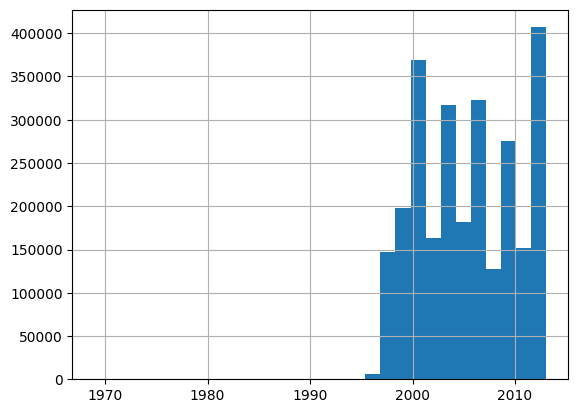

In [40]:
df_all_data_processed['review_year'].hist(bins=30)
plt.show()

In [41]:
df_all_data_processed = df_all_data_processed[df_all_data_processed['review_year']>=2010]

In [42]:
df_all_data_processed.reset_index(drop=True, inplace=True)

In [43]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699531 entries, 0 to 699530
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          699531 non-null  float64
 1   text            699531 non-null  object 
 2   review_year     699531 non-null  int64  
 3   helpfulness_0   699531 non-null  float64
 4   helpfulness_1   699531 non-null  float64
 5   authors         685500 non-null  object 
 6   publisher       567890 non-null  object 
 7   categories      629828 non-null  object 
 8   published_year  699531 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 48.0+ MB


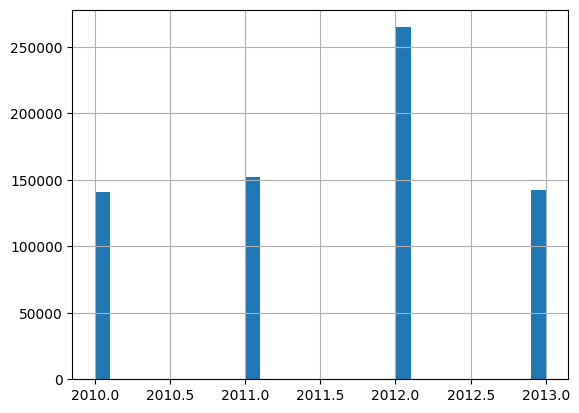

In [44]:
df_all_data_processed['review_year'].hist(bins=30)
plt.show()

Dataset is filtered by published year. Amazon Books was founded on 1995. Books published before this year are removed from the dataset. Scope is reduced to Books published during the Amazon Books Web Store existance.

In [45]:
df_all_data_processed = df_all_data_processed[(df_all_data_processed['published_year'] > 1995) & (df_all_data_processed['published_year'] <= 2013)]

In [46]:
df_all_data_processed.reset_index(drop=True, inplace=True)

In [47]:
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370314 entries, 0 to 370313
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          370314 non-null  float64
 1   text            370314 non-null  object 
 2   review_year     370314 non-null  int64  
 3   helpfulness_0   370314 non-null  float64
 4   helpfulness_1   370314 non-null  float64
 5   authors         364030 non-null  object 
 6   publisher       334901 non-null  object 
 7   categories      360998 non-null  object 
 8   published_year  370314 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 25.4+ MB


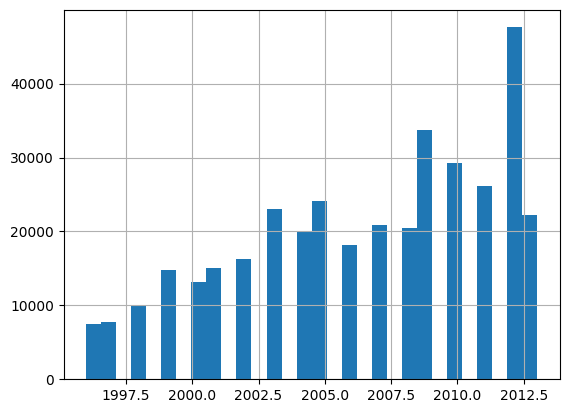

In [48]:
df_all_data_processed['published_year'].hist(bins=30)
plt.show()

In [49]:
df_all_data_processed = df_all_data_processed[df_all_data_processed['review_year'] >= df_all_data_processed['published_year']]
df_all_data_processed.reset_index(drop=True, inplace=True)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333981 entries, 0 to 333980
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          333981 non-null  float64
 1   text            333981 non-null  object 
 2   review_year     333981 non-null  int64  
 3   helpfulness_0   333981 non-null  float64
 4   helpfulness_1   333981 non-null  float64
 5   authors         327851 non-null  object 
 6   publisher       301935 non-null  object 
 7   categories      326309 non-null  object 
 8   published_year  333981 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 22.9+ MB


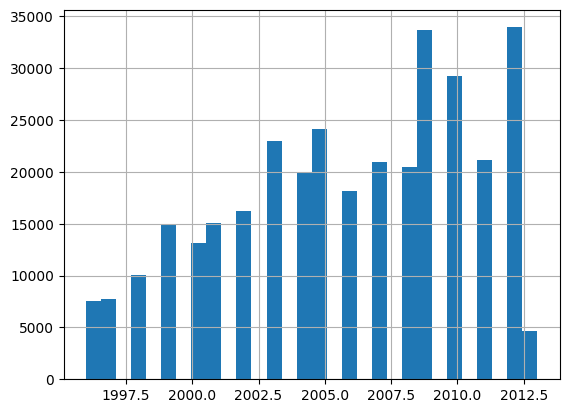

In [50]:
df_all_data_processed['published_year'].hist(bins=30)
plt.show()

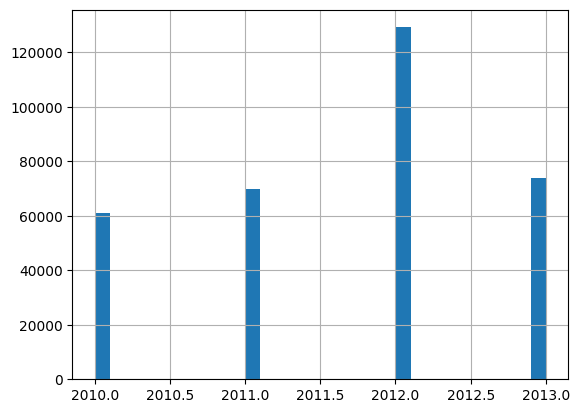

In [51]:
df_all_data_processed['review_year'].hist(bins=30)
plt.show()

### Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 2 666 313, e = 99% and z = 2.58

sample size = 578995. 

A sample of **578 995** entries will be extracted from the Dataset to be processed and to train and test the model.

In [52]:
N = df_all_data_processed.shape[0] - 1
e = 0.01 #Margin of error = 0.1%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 15851


In [53]:
#Extract the sample of 578995 entries from the dataset.
df_all_data_filtered_processed = df_all_data_processed.sample(n=sample_size, random_state=2125)

In [54]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15851 entries, 0 to 15850
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15851 non-null  float64
 1   text            15851 non-null  object 
 2   review_year     15851 non-null  int64  
 3   helpfulness_0   15851 non-null  float64
 4   helpfulness_1   15851 non-null  float64
 5   authors         15564 non-null  object 
 6   publisher       14299 non-null  object 
 7   categories      15463 non-null  object 
 8   published_year  15851 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [55]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    9712
4.0    3105
3.0    1358
1.0     953
2.0     723
Name: count, dtype: int64

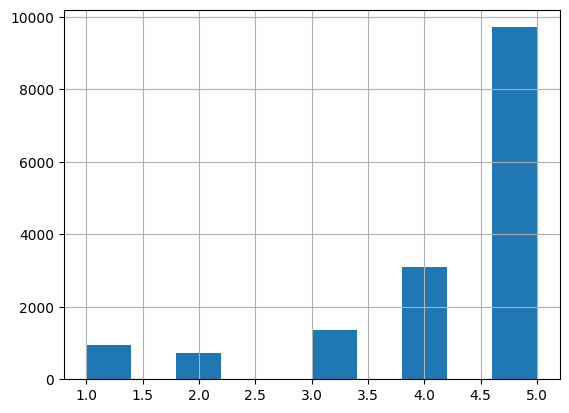

In [56]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [57]:
df_all_data_filtered_processed.isna().sum()

review               0
text                 0
review_year          0
helpfulness_0        0
helpfulness_1        0
authors            287
publisher         1552
categories         388
published_year       0
dtype: int64

In [58]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
12895,5.0,I read this novel a couple years ago and I rem...,2013,0.000,1.000,[Karleen Koen],Sourcebooks Incorporated,[Fiction],2003
13661,4.0,"As a tutor of various subjects, I'm not always...",2011,0.000,1.000,"[Lawrence S. Leff, Elizabeth Waite]",Barrons Educational Series,[Mathematics],2009
13868,4.0,Our family loves this story. It is very funny ...,2012,0.000,1.000,[Nat Reed],Classroom Complete Press,[Education],2008
3388,5.0,The book started out a bit slow as it built ch...,2012,1.000,1.000,[Madeleine Wickham],Random House,[Fiction],2010
13478,4.0,This sequel picked up right where _Talon of th...,2010,0.000,1.000,[Raymond E. Feist],Zondervan,[Fiction],2009
4167,1.0,"This edition lacks in quality, IN SPADES. It's...",2010,0.875,0.875,[by Ambrose Bierce],Lulu.com,[Literary Collections],2009
988,5.0,"I am very, very impressed. This book is a real...",2011,0.000,0.000,[Laurell K. Hamilton],Penguin,[Fiction],2002
13409,4.0,Great story line. I did like this story. I tho...,2012,0.000,1.000,"[Helen Bianchin, Julia James, Jane Porter, Sha...",Harlequin,[Fiction],2008
8610,5.0,I found this book to lift my spiritual well be...,2011,0.000,1.000,[Iyanla Vanzant],Simon and Schuster,[Self-Help],2002
6759,5.0,Nicely written for a novice like me. In fact I...,2011,0.000,1.000,"[Black Mountain Books, Dennis Pagen]",Black Mountain Books,[Aeronautical sports],2001


In [59]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['review', 'text'])
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15425 non-null  float64
 1   text            15425 non-null  object 
 2   review_year     15425 non-null  int64  
 3   helpfulness_0   15425 non-null  float64
 4   helpfulness_1   15425 non-null  float64
 5   authors         15141 non-null  object 
 6   publisher       13896 non-null  object 
 7   categories      15039 non-null  object 
 8   published_year  15425 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [60]:
df_all_data_filtered_processed.sample(10)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
867,5.0,"I loved this book, but I do think you have to ...",2012,0.0,1.0,[Joel Gross],Backinprint.com,[Fiction],2000
4336,3.0,This book uses false logic to reach his conclu...,2011,0.4,0.4,[Desmond Morris],Random House,[Social Science],2010
6757,5.0,I've read many pivotal books over the past 40 ...,2012,0.5,0.5,[Neale Donald Walsch],Simon and Schuster,[Family & Relationships],2007
1146,5.0,CS Lewis takes a methodological and systematic...,2013,0.0,1.0,[C. S. Lewis],Harper Collins,[Religion],2009
4237,4.0,Definitely one of the best true crime books I'...,2010,1.0,1.0,"[Vincent Bugliosi, Curt Gentry]",W. W. Norton & Company,[True Crime],2001
8626,4.0,I have been going through this with my 4 child...,2010,1.0,1.0,[Francis A. Schaeffer],Crossway Books,[Religion],1996
3553,5.0,This book was excellent; very well written and...,2013,0.0,1.0,[Emily Arnold McCully],"Farrar, Straus and Giroux (BYR)",[Juvenile Nonfiction],2013
7946,5.0,This author haas never written a bad book. Rea...,2013,0.0,1.0,[Lee Child],Random House,[Fiction],2009
14450,4.0,"The Picture of Dorian Gray is not just a book,...",2012,1.0,1.0,NaN,NaN,[Audiobooks],2000
9609,5.0,This is another awesome book that just helps t...,2013,0.0,1.0,[Mary Reed],Falcon Guides,[Sports & Recreation],2003


# Initial EDA and Final Preprocesing

## Helpfulness Column

### Removing Outliers

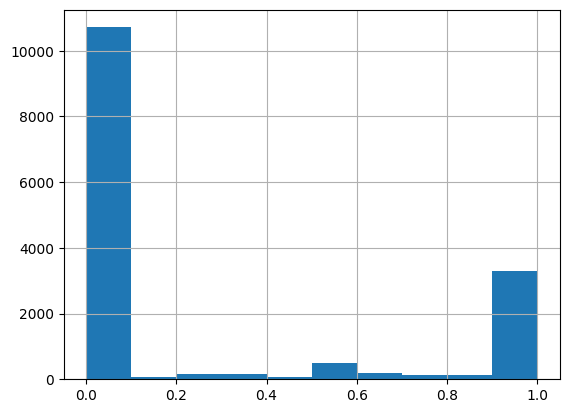

In [61]:
df_all_data_filtered_processed['helpfulness_0'].hist()
plt.show()

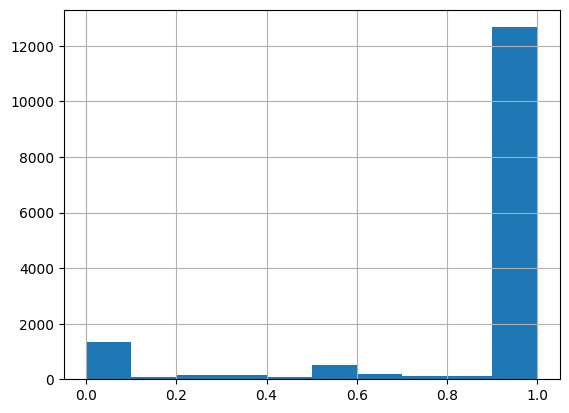

In [62]:
df_all_data_filtered_processed['helpfulness_1'].hist()
plt.show()

Porcentual helpfulness variable values should be between 0 and 1. Outliers are remove as they are just 2 entries from the entire dataset.

In [63]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    15425.000000
mean         0.260085
std          0.415377
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: helpfulness_0, dtype: float64

In [64]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    15425.000000
mean         0.868059
std          0.307611
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness_1, dtype: float64

In [65]:
df_all_data_filtered_processed.shape

(15425, 9)

In [66]:
# df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2].index)
# df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2]['helpfulness_0'].value_counts()

In [67]:
# df_all_data_filtered_processed.reset_index(drop=True, inplace=True)

In [68]:
# df_all_data_filtered_processed.shape

In [69]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    15425.000000
mean         0.868059
std          0.307611
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: helpfulness_1, dtype: float64

In [70]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    15425.000000
mean         0.260085
std          0.415377
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: helpfulness_0, dtype: float64

In [71]:
#Correlation Analysis 
df_all_data_filtered_processed[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.112720,-0.033948
helpfulness_1,0.112720,1.000000,0.328850
review,-0.033948,0.328850,1.000000


Correlation matrix shows that helpfulness_0 and helpfulness_1 are not much correlated. But helpfulness_0 and helpfulness_1 provide the same information. Based on the correlation with 'review' column, helpfulness_1 is kept and helpfulness_0 is removed. In order to avoid repeated information.

In [72]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_0'], axis=1)

In [73]:
df_all_data_filtered_processed['helpfulness'] = df_all_data_filtered_processed['helpfulness_1']
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['helpfulness_1'], axis=1)
df_all_data_filtered_processed.sample(5)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
6283,5.0,Many thanks to Steve Lehman for helping the wo...,2011,"[Steve Lehman, Robert Barnett]",Twin Palms Pub,[Photography],1998,1.0
4174,5.0,This book makes me want to forget how to make ...,2011,[Bonnie Neubauer],Writer's Digest Books,[Reference],2005,1.0
1620,5.0,Book received in good order and on time as pro...,2013,[Iza Trapani],Charlesbridge Publishing,[Juvenile Fiction],2013,1.0
14723,3.0,Worth reading but not a classic. Color and ill...,2012,[Janell Cannon],Houghton Mifflin Harcourt,[Juvenile Fiction],2005,1.0
2434,4.0,I've read a few of Jodi Picoult's books and fo...,2011,[Jodi Picoult],Harper Collins,[Fiction],2009,1.0


## Authors Column

### Authors Names Standarization

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [74]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [75]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15425 non-null  float64
 1   text            15425 non-null  object 
 2   review_year     15425 non-null  int64  
 3   authors         15141 non-null  object 
 4   publisher       13896 non-null  object 
 5   categories      15039 non-null  object 
 6   published_year  15425 non-null  int64  
 7   helpfulness     15425 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 964.2+ KB


In [76]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [77]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

### Updating the Authors Feature to Categorical, and applying Pareto Principe to reduce the quantity of authors.

In [78]:
author_counts = df_all_data_filtered_processed['authors'].explode().value_counts()
author_counts

authors
J. R. R. Tolkien     754
Charles Dickens      274
Lewis Carroll        154
C. S. Lewis          145
Jane Austen          126
                    ... 
Randolph M. Nesse      1
Victoria McKernan      1
Henry Lipson           1
Stephen G. Lipson      1
K. Devlin              1
Name: count, Length: 7750, dtype: int64

In [79]:
sorted_author_counts = author_counts.sort_values(ascending=False)
sorted_author_counts

authors
J. R. R. Tolkien    754
Charles Dickens     274
Lewis Carroll       154
C. S. Lewis         145
Jane Austen         126
                   ... 
Paul Virilio          1
Tony Bacon            1
Paul Day              1
Lauren Slater         1
K. Devlin             1
Name: count, Length: 7750, dtype: int64

In [80]:
pareto_threshold = int(0.2 * len(sorted_author_counts))
pareto_threshold

1550

In [81]:
top_authors = sorted_author_counts.iloc[:pareto_threshold].index
top_authors

Index(['J. R. R. Tolkien', 'Charles Dickens', 'Lewis Carroll', 'C. S. Lewis',
       'Jane Austen', 'Kurt Vonnegut', 'Aldous Huxley', 'Arthur Conan Doyle',
       'Lee Child', 'Agatha Christie',
       ...
       'Pope John Paul II', 'Opal Whiteley', 'Amy D. Shojai', 'Barbara Vine',
       'Immanuel Kant', 'John L. Smith', 'Robert W. Funk', 'Katherine Dunn',
       'Davis Love III', 'Martin Waddell'],
      dtype='object', name='authors', length=1550)

In [82]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_authors else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

1551

After applying Pareto Principle, there are still 1551 unique authors on the dataset. If authors is considered as a Categorical Feature, it will not have much predictive because it has a lot of Cardinality.

Top 10 authors with most reviews are kept and the rest of authors are set to 'Other'.

In [83]:
authors = df_all_data_filtered_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 18082 entries, 0 to 15424
Series name: authors
Non-Null Count  Dtype 
--------------  ----- 
18082 non-null  object
dtypes: object(1)
memory usage: 282.5+ KB


In [84]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 1551


In [85]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 18082


In [86]:
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)
top_10_authors_counts

authors
Other                 7115
J. R. R. Tolkien       754
Charles Dickens        274
Lewis Carroll          154
C. S. Lewis            145
Jane Austen            126
Kurt Vonnegut          120
Aldous Huxley           99
Arthur Conan Doyle      97
Lee Child               73
Name: count, dtype: int64

In [87]:
other_authors_counts = author_counts[10:]
other_authors_counts

authors
Agatha Christie           69
Charlotte Brontë          64
Viktor E Frankl           61
Robert Louis Stevenson    60
Jules Verne               58
                          ..
patrick mcenroe            2
Clarence W. Coles          2
Dorion Sagan               2
Lynn Margulis              2
Judith Fertig              2
Name: count, Length: 1541, dtype: int64

In [88]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: [author if author in top_10_authors_counts else 'Other' for author in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['authors'].explode().unique())

10

In [89]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other                 16240
J. R. R. Tolkien        754
Charles Dickens         274
Lewis Carroll           154
C. S. Lewis             145
Jane Austen             126
Kurt Vonnegut           120
Aldous Huxley            99
Arthur Conan Doyle       97
Lee Child                73
Name: count, dtype: int64

In [90]:
def remove_repeated_values(in_list):
    unique_list = []
    for item in in_list:
        if item not in unique_list:
            unique_list.append(item)

    return unique_list

In [91]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
14819,5.0,"We love this book. The recipes are good, easy ...",2012,[Other],Harvard Common Press,[Cooking],2000,1.0
13102,4.0,"Good story lines, good author, currently readi...",2011,[Other],Random House,[Fiction],2010,0.0
3407,3.0,As anyone familiar with the work of Jon Mellen...,2011,[Other],W. W. Norton & Company,[Fiction],2000,1.0
11297,4.0,"This is another entertaining, turn of the twen...",2011,[Other],Minotaur Books,[Fiction],2007,1.0
9992,5.0,This is a lovely story based on actual and pos...,2011,"[Other, Other]",Thomas Nelson,[Juvenile Fiction],2000,1.0


In [92]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(lambda x: remove_repeated_values(x))

In [93]:
df_all_data_filtered_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
14819,5.0,"We love this book. The recipes are good, easy ...",2012,[Other],Harvard Common Press,[Cooking],2000,1.0
13102,4.0,"Good story lines, good author, currently readi...",2011,[Other],Random House,[Fiction],2010,0.0
3407,3.0,As anyone familiar with the work of Jon Mellen...,2011,[Other],W. W. Norton & Company,[Fiction],2000,1.0
11297,4.0,"This is another entertaining, turn of the twen...",2011,[Other],Minotaur Books,[Fiction],2007,1.0
9992,5.0,This is a lovely story based on actual and pos...,2011,[Other],Thomas Nelson,[Juvenile Fiction],2000,1.0


In [94]:
df_all_data_filtered_processed['authors'].explode().value_counts()

authors
Other                 13601
J. R. R. Tolkien        754
Charles Dickens         274
Lewis Carroll           154
C. S. Lewis             145
Jane Austen             126
Kurt Vonnegut           120
Aldous Huxley            99
Arthur Conan Doyle       97
Lee Child                73
Name: count, dtype: int64

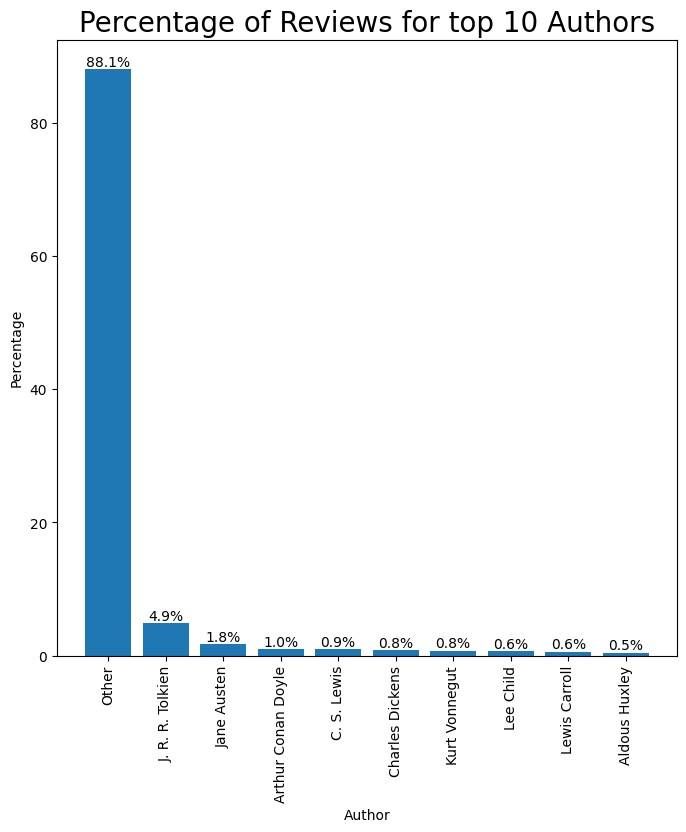

In [95]:
#Show a barplot by Percentages
author_percetage = df_all_data_filtered_processed['authors'].explode().value_counts()/df_all_data_filtered_processed['authors'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_filtered_processed['authors'].explode().unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()

Top 10 authors only represents the 11.9% of the Total Dataset Reviews. Beacause of the Cardinality of this feature, Authors is removed from the Dataset.

In [96]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(['authors'], axis=1)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15425 non-null  float64
 1   text            15425 non-null  object 
 2   review_year     15425 non-null  int64  
 3   publisher       13896 non-null  object 
 4   categories      15039 non-null  object 
 5   published_year  15425 non-null  int64  
 6   helpfulness     15425 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 843.7+ KB


## Cateogories Column

### Updating the Categories Feature to Categorical, and applying Pareto Principe to reduce the quantity of Categories.

In [97]:
categories_counts = df_all_data_filtered_processed['categories'].explode().value_counts()
categories_counts

categories
Fiction                      5197
Juvenile Fiction             1622
Religion                      881
Biography & Autobiography     642
History                       562
                             ... 
Bibliography                    1
Lampshades                      1
Handbags                        1
Automobiles                     1
Antarctica                      1
Name: count, Length: 589, dtype: int64

In [98]:
sorted_category_counts = categories_counts.sort_values(ascending=False)
sorted_category_counts

categories
Fiction                      5197
Juvenile Fiction             1622
Religion                      881
Biography & Autobiography     642
History                       562
                             ... 
Anger                           1
Falconry                        1
Autobiography                   1
Big books                       1
Antarctica                      1
Name: count, Length: 589, dtype: int64

In [99]:
pareto_threshold = int(0.2 * len(sorted_category_counts))
pareto_threshold

117

In [100]:
top_categories = sorted_category_counts.iloc[:pareto_threshold].index
top_categories

Index(['Fiction', 'Juvenile Fiction', 'Religion', 'Biography & Autobiography',
       'History', 'Business & Economics', 'Cooking', 'Juvenile Nonfiction',
       'Family & Relationships', 'Self-Help',
       ...
       'Love stories', 'JUVENILE FICTION', 'Presidents', 'Costa Rica',
       'Ghost stories', 'Sub-Saharan', 'Narnia (Imaginary place)',
       'College readers', 'Motivation (Psychology)', '"Children's libraries"'],
      dtype='object', name='categories', length=117)

In [101]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_categories else 'Other' for category in x] if isinstance(x, list) else ['Other'])
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Fiction                      5197
Juvenile Fiction             1622
Other                        1060
Religion                      881
Biography & Autobiography     642
                             ... 
Narnia (Imaginary place)        5
Sub-Saharan                     5
College readers                 4
Motivation (Psychology)         4
"Children's libraries"          4
Name: count, Length: 118, dtype: int64

After applying Pareto Principle, there are still 117 unique categories on the dataset. If categories is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 categories with most reviews are kept and the rest of categories are set to 'Other'.

In [102]:
categories = df_all_data_filtered_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 15740 entries, 0 to 15424
Series name: categories
Non-Null Count  Dtype 
--------------  ----- 
15740 non-null  object
dtypes: object(1)
memory usage: 245.9+ KB


In [103]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 118


In [104]:
categories_counts = categories.value_counts(ascending=False)
print(f'Total of entries after explode Categories column {categories_counts.sum()}')

Total of entries after explode Categories column 15740


Categories are groped on 19 Categories. Based on the Literary genre.

In [ ]:
# categories_mapping = {
#     'Juvenile Fiction' : 'Fiction',
#     'Fantasy fiction' : 'Fiction',
#     'Jewish fiction' : 'Fiction',
#     'Classical fiction' : 'Fiction',

#     'Bibles' : 'Religion',
#     'Bible' : 'Religion'
# }

In [105]:
top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_10_categories_counts

categories
Fiction                      5197
Juvenile Fiction             1622
Other                        1060
Religion                      881
Biography & Autobiography     642
History                       562
Business & Economics          429
Cooking                       250
Juvenile Nonfiction           223
Family & Relationships        217
Name: count, dtype: int64

In [234]:
other_categories_counts = categories_counts[10:]
other_categories_counts

categories
Self-Help                   207
Health & Fitness            198
Body                        186
Mind & Spirit               186
Social Science              157
                           ... 
Narnia (Imaginary place)      5
Sub-Saharan                   5
College readers               4
Motivation (Psychology)       4
"Children's libraries"        4
Name: count, Length: 108, dtype: int64

In [235]:
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: [category if category in top_10_categories_counts else 'Other' for category in x] if isinstance(x, list) else ['Other'])
len(df_all_data_filtered_processed['categories'].explode().unique())

10

In [236]:
df_all_data_filtered_processed['categories'].explode().value_counts()

categories
Other                        5717
Fiction                      5197
Juvenile Fiction             1622
Religion                      881
Biography & Autobiography     642
History                       562
Business & Economics          429
Cooking                       250
Juvenile Nonfiction           223
Family & Relationships        217
Name: count, dtype: int64

In [237]:
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,publisher,categories,published_year,helpfulness
14782,1.0,The book is about a young hobit that goes on a...,2013,Mariner Books,[Juvenile Fiction],2012,0.0
1891,5.0,This book was a total inspiration to read. Mat...,2011,Thomas Nelson,[Religion],2000,1.0
11638,3.0,I really do enjoy the story but the imagery is...,2012,Spectra,[Fiction],2011,1.0
5127,5.0,This book deserves another 5 star review. I pl...,2011,Penguin,[Fiction],2006,1.0
4906,5.0,"With the fun lyrics and wonderful music, it is...",2010,Workman Publishing,[Juvenile Nonfiction],2002,1.0


In [238]:
# Some of the authors list contains 'Other' multiple times.
df_all_data_filtered_processed['categories'] = df_all_data_filtered_processed['categories'].apply(lambda x: remove_repeated_values(x))
df_all_data_filtered_processed.sample(5, random_state=45)

,review,text,review_year,publisher,categories,published_year,helpfulness
14782,1.0,The book is about a young hobit that goes on a...,2013,Mariner Books,[Juvenile Fiction],2012,0.0
1891,5.0,This book was a total inspiration to read. Mat...,2011,Thomas Nelson,[Religion],2000,1.0
11638,3.0,I really do enjoy the story but the imagery is...,2012,Spectra,[Fiction],2011,1.0
5127,5.0,This book deserves another 5 star review. I pl...,2011,Penguin,[Fiction],2006,1.0
4906,5.0,"With the fun lyrics and wonderful music, it is...",2010,Workman Publishing,[Juvenile Nonfiction],2002,1.0


In [239]:
df_all_data_filtered_processed['categories'].explode().value_counts(ascending=True)

categories
Family & Relationships        217
Juvenile Nonfiction           223
Cooking                       250
Business & Economics          429
History                       562
Biography & Autobiography     642
Religion                      881
Juvenile Fiction             1622
Fiction                      5197
Other                        5402
Name: count, dtype: int64

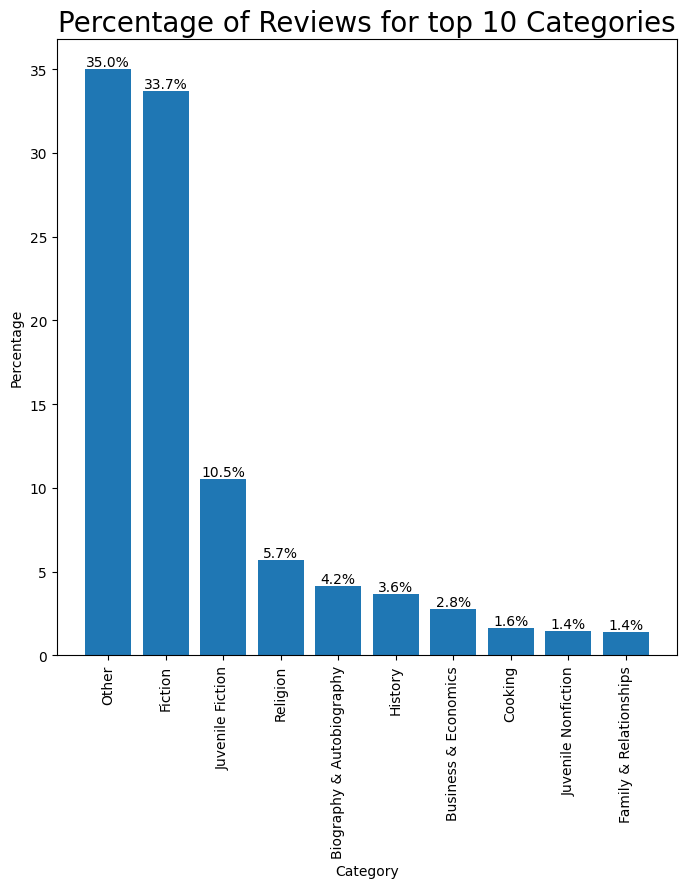

In [240]:
#Show a barplot by Percentages
category_percetage = df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False)/df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_filtered_processed['categories'].explode().value_counts(ascending=False).keys(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

Top 10 Categories different than Other have a good representation on the Dataset. This variable is kept.

In [241]:
df_all_data_filtered_processed.shape

(15425, 7)

In [242]:
df_all_data_filtered_processed = df_all_data_filtered_processed.explode('categories')
df_all_data_filtered_processed.shape

(15425, 7)

In [243]:
df_all_data_filtered_processed.sample(5)

,review,text,review_year,publisher,categories,published_year,helpfulness
4770,2.0,The book has many good points. It's true all o...,2012,Shambhala Publications,Religion,2001,0.0
4367,3.0,There are several reasons why this edition at ...,2012,Penguin Classics,Other,2012,1.0
8574,5.0,Couldn't find my original copy and wanted the ...,2013,Houghton Mifflin Harcourt,Fiction,2013,1.0
2306,5.0,This book explains the benefit and importance ...,2010,Albert Whitman Prairie Books (,Juvenile Fiction,2004,1.0
7638,5.0,This book was outstanding when it was written ...,2010,Delta,Other,2008,1.0


## Publisher Column

In [244]:
publisher_mapping = {
    'Penguin UK':'Penguin',
    'HarperCollins': 'Harper Collins',
    'HarperCollins UK' :  'Harper Collins'
    }

In [245]:
def standardize_publisher(publisher):
    if pd.isna(publisher):        
        return publisher  # Return the original value if it's not a list
    else:

        return publisher_mapping.get(publisher, publisher)

In [246]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(standardize_publisher)

In [247]:
publisher_counts = df_all_data_filtered_processed['publisher'].value_counts()
publisher_counts

publisher
Penguin                  1186
Harper Collins            930
Simon and Schuster        736
Mariner Books             584
Random House              311
                         ... 
Bedford/St. Martin's        1
Scholastic UK               1
University of Alberta       1
Virgin Books                1
WH Freeman                  1
Name: count, Length: 1893, dtype: int64

### Updating the publisher Feature to Categorical, and applying Pareto Principe to reduce the quantity of publishers.

In [248]:
sorted_publisher_counts = publisher_counts.sort_values(ascending=False)
sorted_publisher_counts[:25]

publisher
Penguin                              1186
Harper Collins                        930
Simon and Schuster                    736
Mariner Books                         584
Random House                          311
Vintage                               245
Macmillan                             218
Houghton Mifflin Harcourt             204
Bantam                                165
Courier Corporation                   158
The Floating Press                    148
John Wiley & Sons                     147
Hachette UK                           131
W. W. Norton & Company                116
Baker Books                           101
Anchor                                 94
Bethany House                          93
Ballantine Books                       93
Sourcebooks, Inc.                      88
Oxford University Press                86
Zondervan                              82
Tyndale House Publishers, Inc.         77
Dial Press Trade Paperback             73
Berkley                 

In [249]:
pareto_threshold = int(0.2 * len(sorted_publisher_counts))
pareto_threshold

378

In [250]:
top_publishers = sorted_publisher_counts.iloc[:pareto_threshold].index
top_publishers

Index(['Penguin', 'Harper Collins', 'Simon and Schuster', 'Mariner Books',
       'Random House', 'Vintage', 'Macmillan', 'Houghton Mifflin Harcourt',
       'Bantam', 'Courier Corporation',
       ...
       'Barrons Educational Series Incorporated', 'Piccadilly Books, Ltd.',
       'Pearson', 'Running PressBook Pub', 'Doubleday Books for Young Readers',
       'Book Publishing Company', 'Avon Books', 'Touchstone Books',
       'HarperCollins Children's Books', 'PuddleDancer Press'],
      dtype='object', name='publisher', length=378)

In [251]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_publishers else 'Other')
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                         4007
Penguin                       1186
Harper Collins                 930
Simon and Schuster             736
Mariner Books                  584
                              ... 
Bantam Press                     5
Workman Publishing Company       5
Robert Rose Incorporated         5
Touchstone Books                 5
Bedford/st Martins               5
Name: count, Length: 379, dtype: int64

After applying Pareto Principle, there are still 380 unique publishers on the dataset. If publishers is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 publishers with most reviews are kept and the rest of publishers are set to 'Other'. In order to keep the feature and analize the predicting power.

In [252]:
publishers = df_all_data_filtered_processed['publisher']
publishers.info()

<class 'pandas.core.series.Series'>
Index: 15425 entries, 0 to 15424
Series name: publisher
Non-Null Count  Dtype 
--------------  ----- 
15425 non-null  object
dtypes: object(1)
memory usage: 241.0+ KB


In [253]:
print(f'Total of Publishers: {len(publishers.unique())}')

Total of Publishers: 379


In [254]:
publisher_counts = publishers.value_counts(ascending=False)
publisher_counts

publisher
Other                         4007
Penguin                       1186
Harper Collins                 930
Simon and Schuster             736
Mariner Books                  584
                              ... 
Bantam Press                     5
Workman Publishing Company       5
Robert Rose Incorporated         5
Touchstone Books                 5
Bedford/st Martins               5
Name: count, Length: 379, dtype: int64

In [255]:
top_10_publishers_counts = publisher_counts[:10].sort_values(ascending=False)
top_10_publishers_counts

publisher
Other                        4007
Penguin                      1186
Harper Collins                930
Simon and Schuster            736
Mariner Books                 584
Random House                  311
Vintage                       245
Macmillan                     218
Houghton Mifflin Harcourt     204
Bantam                        165
Name: count, dtype: int64

In [256]:
other_publishers_counts = publisher_counts[10:]
other_publishers_counts

publisher
Courier Corporation           158
The Floating Press            148
John Wiley & Sons             147
Hachette UK                   131
W. W. Norton & Company        116
                             ... 
Bantam Press                    5
Workman Publishing Company      5
Robert Rose Incorporated        5
Touchstone Books                5
Bedford/st Martins              5
Name: count, Length: 369, dtype: int64

In [257]:
df_all_data_filtered_processed['publisher'] = df_all_data_filtered_processed['publisher'].apply(lambda publisher: publisher if publisher in top_10_publishers_counts else 'Other')
len(df_all_data_filtered_processed['publisher'].unique())

10

In [258]:
df_all_data_filtered_processed['publisher'].value_counts()

publisher
Other                        10846
Penguin                       1186
Harper Collins                 930
Simon and Schuster             736
Mariner Books                  584
Random House                   311
Vintage                        245
Macmillan                      218
Houghton Mifflin Harcourt      204
Bantam                         165
Name: count, dtype: int64

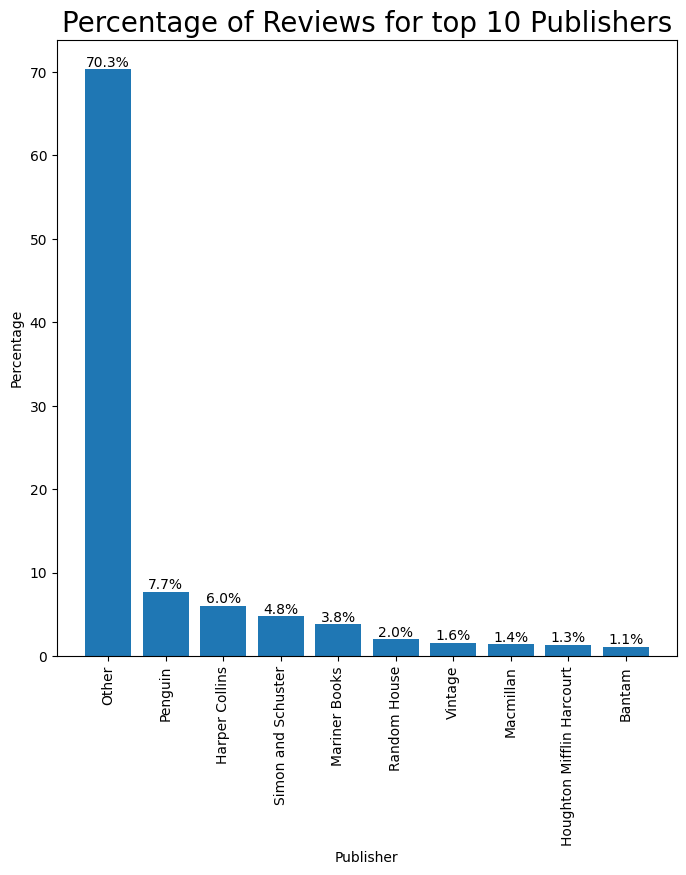

In [259]:
#Show a barplot by Percentages
publisher_percetage = df_all_data_filtered_processed['publisher'].value_counts(ascending=False)/df_all_data_filtered_processed['publisher'].value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_filtered_processed['publisher'].value_counts(ascending=False).keys(), publisher_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


Top 10 publishers different than Other represents the 29.68% of the dataset. The variable is kept.


# Processed Datasets Saving

In [260]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15425 entries, 0 to 15424
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           15425 non-null  int64  
 1   review          15425 non-null  float64
 2   text            15425 non-null  object 
 3   review_year     15425 non-null  int64  
 4   publisher       15425 non-null  object 
 5   categories      15425 non-null  object 
 6   published_year  15425 non-null  int64  
 7   helpfulness     15425 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 964.2+ KB


In [261]:
#A reduced Dataset is created to process Text Column and Apply sentiment Analysis.
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
8736,8736,"This is a classic western, but not what Louis ..."
13778,13778,Awesome book!! Small steps is the sequel to ho...
5064,5064,"This book is not a ""How To Build a Schooner"" b..."
4196,4196,"There are few books that change your life, or ..."
2935,2935,When Koontz tells a story he has the ability t...
2491,2491,"I had never read anything from Stuart Woods, b..."
1138,1138,Met Carlos in Viet Nam. Did not know then the ...
14400,14400,May be easy to follow if you're familiar with ...
2933,2933,This is a must read book for Christians. I've ...
6025,6025,I just discovered this author and can I just s...


In [262]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [263]:
df_reduced.to_csv('../data/processed/df_reduced.csv')